In [5]:
%matplotlib inline

import scipy.stats as stats
import numpy as np
import pylab as pl

# Test 1

In [31]:
Nsample = 200
Nrep    = 1000

### Two exact identical uniforms

In [41]:
pres = []

for j in range(Nrep):
    X = np.random.rand(Nsample)
    Y = np.random.rand(Nsample)
    u, p = stats.mannwhitneyu(X,Y)
    pres.append(p)

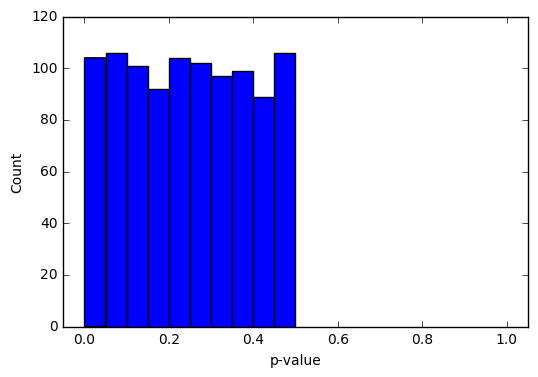

In [42]:
pl.hist(pres)

pl.xlim(-0.05,1.05)
pl.xlabel('p-value')
pl.ylabel('Count')

pl.show()

### Uniforms with different means

In [44]:
listAvgY = [0., 0.5, 1.0]

In [46]:
pres = {}

for avg_idx in range(len(listAvgY)):
    pres[avg_idx] = []
    
    for j in range(Nrep):
        X = np.random.rand(Nsample)
        Y = np.random.rand(Nsample) + listAvgY[avg_idx]
        u, p = stats.mannwhitneyu(X,Y)
        pres[avg_idx].append(p)

In [66]:
? pl.subplot

(array([ 2.15,  2.  ,  2.05,  2.06,  1.74,  0.  ,  0.  ,  0.  ,  0.  ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 <a list of 9 Patch objects>)

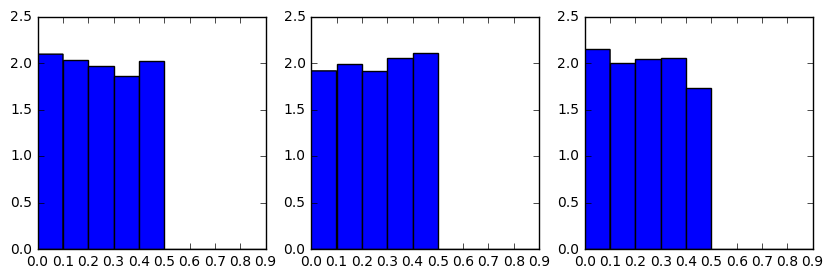

In [70]:
pl.figure(figsize=(10,3))

pl.subplot(1,3,1)
pl.hist(pres[0], bins=np.arange(0,1,0.1), normed = True)

pl.subplot(1,3,2)
pl.hist(pres[1], bins=np.arange(0,1,0.1), normed = True)

pl.subplot(1,3,3)
pl.hist(pres[2], bins=np.arange(0,1,0.1), normed = True)

### Uniforms with same mean but different variance

In [73]:
listSigY = [0.5, 1.0, 2.0, 10., 100.]

In [76]:
pres = {}

for avg_idx in range(len(listSigY)):
    pres[avg_idx] = []
    
    for j in range(Nrep):
        X = np.random.rand(Nsample) - 0.5
        Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[avg_idx] )
        u, p = stats.mannwhitneyu(X,Y)
        pres[avg_idx].append(p)

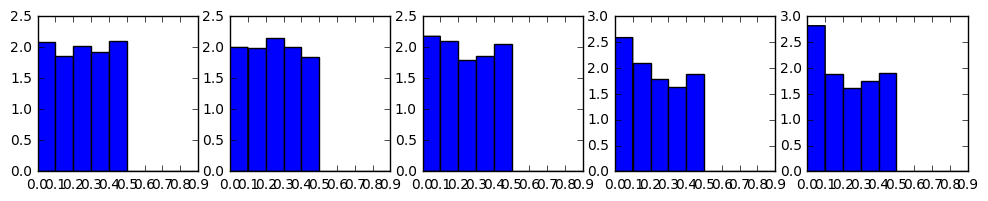

In [78]:
pl.figure(figsize=(12,2))
n = len(listSigY)

for j in range(n):
    pl.subplot(1,n,j+1)
    pl.hist(pres[j], bins=np.arange(0,1,0.1), normed = True)

In [110]:
listSigY = np.arange(0,1001.,100.)

means = []
sds   = []

for avg_idx in range(len(listSigY)):
    pres = []
    
    for j in range(Nrep):
        X = np.random.rand(Nsample) - 0.5
        Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[avg_idx] )
        u, p = stats.mannwhitneyu(X,Y)
        pres.append(p)
    
    means.append( np.mean(pres) )
    sds.append( np.std(pres) )

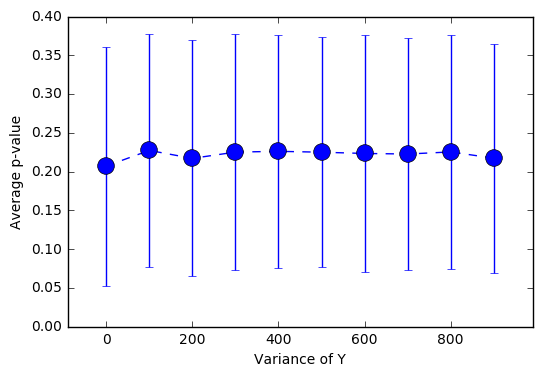

In [114]:
pl.errorbar(listSigY, means, yerr=sds, fmt='o--', markersize=12)

pl.ylim(0.0, 0.4)
pl.xlim(-0.1*listSigY[-1], 1.1*listSigY[-1])

pl.ylabel('Average p-value')
pl.xlabel('Variance of Y')

pl.show()

### Was it because of mean zero?

In [123]:
listSigY = np.arange(0,1001.,100.)
listAvg = [0., -2.0, 5.0]

means = {}
sds   = {}

for avg_idx in range(len(listAvg)):
    means[avg_idx] = []
    sds[avg_idx]  = []
    for sig_idx in range(len(listSigY)):
        pres = []

        for j in range(Nrep):
            X = np.random.rand(Nsample) - 0.5 + listAvg[avg_idx]
            Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[sig_idx] ) + listAvg[avg_idx]
            u, p = stats.mannwhitneyu(X,Y)
            pres.append(p)

        means[avg_idx].append( np.mean(pres) )
        sds[avg_idx].append( np.std(pres) )

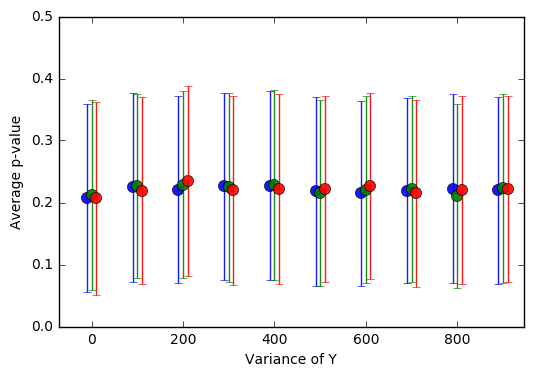

In [139]:
pl.errorbar(listSigY-10, means[0], yerr=sds[0], fmt='o', markersize=8, alpha = 0.9)
pl.errorbar(listSigY, means[1], yerr=sds[1], fmt='o', markersize=8, alpha = 0.9)
pl.errorbar(listSigY+10, means[2], yerr=sds[2], fmt='o', markersize=8, alpha = 0.9)

pl.ylim(-0.0, 0.5)
pl.xlim(-0.08*listSigY[-1], 1.05*listSigY[-1])

pl.ylabel('Average p-value')
pl.xlabel('Variance of Y')

pl.show()

### Changing mean of X

In [166]:
listSigY = np.arange(0,1001.,100.)
listAvgY = [0., -2.0, 5.0, 0.]
listAvgX = [0., -2.0, 5.0, 500]

means = {}
sds   = {}

for avg_idx in range(len(listAvgX)):
    means[avg_idx] = []
    sds[avg_idx]  = []
    for sig_idx in range(len(listSigY)):
        pres = []

        for j in range(Nrep):
            X = np.random.rand(Nsample) - 0.5 + listAvgX[avg_idx]
            Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[sig_idx] ) + listAvgY[avg_idx]
            u, p = stats.mannwhitneyu(X,Y)
            pres.append(p)

        means[avg_idx].append( np.mean(pres) )
        sds[avg_idx].append( np.std(pres) )

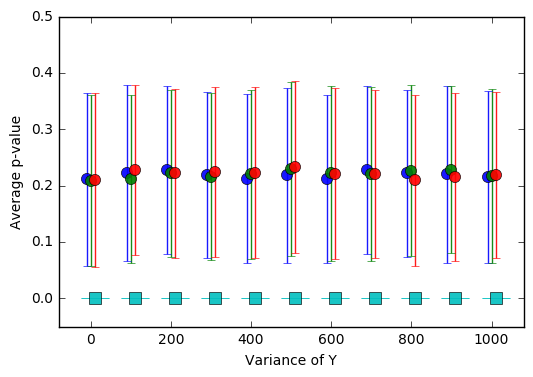

In [168]:
pl.errorbar(listSigY-10, means[0], yerr=sds[0], fmt='o', markersize=8, alpha = 0.9)
pl.errorbar(listSigY, means[1], yerr=sds[1], fmt='o', markersize=8, alpha = 0.9)
pl.errorbar(listSigY+10, means[2], yerr=sds[2], fmt='o', markersize=8, alpha = 0.9)
pl.errorbar(listSigY+10, means[3], yerr=sds[3], fmt='s', markersize=8, alpha = 0.9, elinewidth=15, capsize=10)

pl.ylim(-0.05, 0.5)
pl.ylabel('Average p-value')

pl.xlim(-0.08*listSigY[-1], 1.08*listSigY[-1])
pl.xlabel('Variance of Y')
pl.xticks(np.arange(0,1001,200))

pl.show()

# Checking the distributions

(-0.05, 1.05)

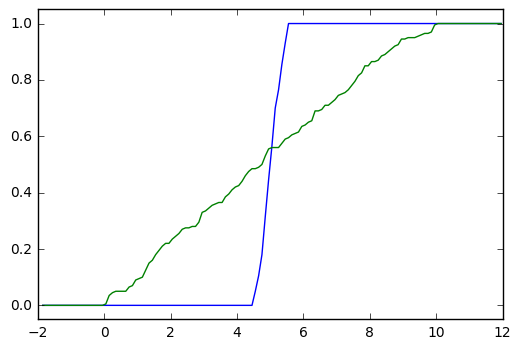

In [208]:
X = np.random.rand(Nsample) - 0.5 + listAvgX[2]
Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[1] ) + listAvgY[2]

dmin = min(X.min(), Y.min())
dmax = max(X.max(), Y.max())
delt = dmax - dmin
dmax = dmax + delt*0.2
dmin = dmin - delt*0.2

hist, bins = np.histogram(X, bins = np.arange(dmin, dmax, 0.1))
F = np.cumsum(hist, dtype=float)
pl.plot(bins[1:], F/F.max())

hist, bins = np.histogram(Y, bins = np.arange(dmin, dmax, 0.1))
F = np.cumsum(hist, dtype=float)
pl.plot(bins[1:], F/F.max())

pl.ylim(-0.05,1.05)

(-0.05, 1.05)

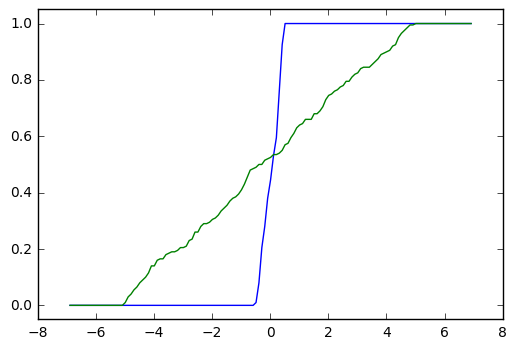

In [209]:
X = np.random.rand(Nsample) - 0.5 + listAvgX[0]
Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[1] ) + listAvgY[0]

dmin = min(X.min(), Y.min())
dmax = max(X.max(), Y.max())
delt = dmax - dmin
dmax = dmax + delt*0.2
dmin = dmin - delt*0.2

hist, bins = np.histogram(X, bins = np.arange(dmin, dmax, 0.1))
F = np.cumsum(hist, dtype=float)
pl.plot(bins[1:], F/F.max())

hist, bins = np.histogram(Y, bins = np.arange(dmin, dmax, 0.1))
F = np.cumsum(hist, dtype=float)
pl.plot(bins[1:], F/F.max())

pl.ylim(-0.05,1.05)

(-0.05, 1.05)

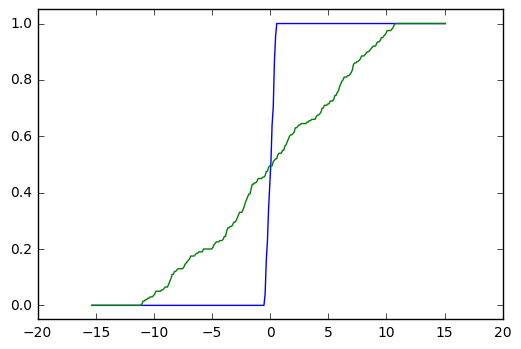

In [211]:
X = np.random.rand(Nsample) - 0.5 + listAvgX[0]
Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[5] ) + listAvgY[0]

dmin = min(X.min(), Y.min())
dmax = max(X.max(), Y.max())
delt = dmax - dmin
dmax = dmax + delt*0.2
dmin = dmin - delt*0.2

hist, bins = np.histogram(X, bins = np.arange(dmin, dmax, 0.1))
F = np.cumsum(hist, dtype=float)
pl.plot(bins[1:], F/F.max())

hist, bins = np.histogram(Y, bins = np.arange(dmin, dmax, 0.1))
F = np.cumsum(hist, dtype=float)
pl.plot(bins[1:], F/F.max())

pl.ylim(-0.05,1.05)

### Changing average to test precision

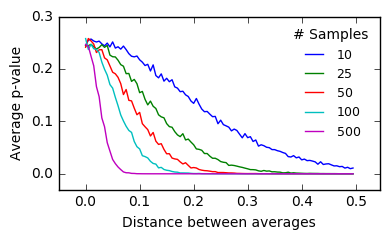

In [252]:
listSigY = [1.0]
listAvg  = np.arange(0.,0.5,0.005)

means = {}
sds   = {}

pl.figure(figsize=(4,2.5))

for Nsample in [10, 25, 50, 100, 500]:
    for sig_idx in range(len(listSigY)):
        means[sig_idx] = []
        sds[sig_idx]  = []
        for avg_idx in range(len(listAvg)):
            pres = []

            for j in range(Nrep):
                X = np.random.rand(Nsample) - 0.5
                Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[sig_idx] ) + listAvg[avg_idx]
                u, p = stats.mannwhitneyu(X,Y)
                pres.append(p)

            means[sig_idx].append( np.mean(pres) )
            sds[sig_idx].append( np.std(pres) )

        pl.plot(listAvg, means[0], '-', label=str(Nsample))


pl.ylim(-0.03,0.3)
pl.yticks(np.arange(0,0.31,0.1))
pl.xlim(-0.05,listAvg[-1]+0.05)
pl.legend(bbox_to_anchor=(1.0,1.0), fontsize=9, frameon=False, title='# Samples')

pl.ylabel('Average p-value')
pl.xlabel('Distance between averages')


pl.tight_layout()
pl.savefig('KJBAS.png', dpi=500)

In [ ]:
listSigY = [1.0]
listAvg  = np.arange(0.,0.5,0.005)

means = {}
sds   = {}

pl.figure(figsize=(4,2.5))

for Nsample in [10]:
    for sig_idx in range(len(listSigY)):
        means[sig_idx] = []
        sds[sig_idx]  = []
        for avg_idx in range(len(listAvg)):
            pres = []

            for j in range(Nrep):
                X = np.random.rand(Nsample) - 0.5
                Y = (np.random.rand(Nsample) - 0.5)*np.sqrt( listSigY[sig_idx] ) + listAvg[avg_idx]
                u, p = stats.mannwhitneyu(X,Y)
                pres.append(p)

            means[sig_idx].append( np.mean(pres) )
            sds[sig_idx].append( np.std(pres) )
        
        means = np.array(means)
        n = np.argmin( means )